In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

from sklearn.decomposition import PCA


%matplotlib inline

import statsmodels.api as sm

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.mixture import GaussianMixture # EM/GMM
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

In [6]:
spotify = pd.read_csv(r"/Users/kaylacho/Desktop/spotify_data.csv")
spotify.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [7]:
spotify.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [8]:

spotify['year'] = spotify['year'].astype(object)
spotify['artists'] = spotify['artists'].astype(object)
print(spotify.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  object 
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [9]:
spotify.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

### Question 1: Can we predict the danceability of a song based on energy, instrumental-ness, valence, tempo, loudness, and speechiness of a song?
#### Changes to Analysis Plan: None.
#### a) The analysis code

In [10]:
np.random.seed(100)
kf = KFold(n_splits = 20)
predictors = ["energy", "instrumentalness", "valence", "tempo", "loudness", "speechiness"]
X = spotify[predictors]
y = spotify["danceability"]

lr = LinearRegression()
mse = []
r2 = []
true_values = []
predicted_Outcome = []

for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y1_train = y[train]
    y1_test  = y[test]
    
    #Zscore
    zscore = StandardScaler()
    zscore.fit(X_train)

    #Zscore both train / test
    X1_train = zscore.transform(X_train)
    X1_test = zscore.transform(X_test)
    # model
    model1 = lr.fit(X1_train, y1_train)
    # record accuracy
    mse.append(mean_squared_error(y1_test, model1.predict(X1_test)))
    r2.append(r2_score(y1_test,model1.predict(X1_test)))
    
    #record
    true_values.append(y1_test)
    #record predictors 
    predicted_Outcome.append(model1.predict(X1_test))

In [11]:
np.mean(mse)

0.018415943524137068

In [26]:
np.mean(r2)

0.3914801529264272

#### b) Explicit answer to the question: Can we predict the danceability of a song based on energy, instrumental-ness, valence, tempo, loudness, and speechiness of a song?

Based on our R2 and Mean Squared Error (MSE) results, the model we produced is fairly able to predict the danceability of a song based on energy, instrumental-ness, valence, tempo, loudness, and speechiness of a song. Since we are measuring danceability, there is an average error of approximately 0.1357 per data point (square root of 0.018416), which in this context is average because danceability is on a scale of 0 to 1. Although this model seems to have an average amount of error,we also looked at the R2 of the model to get a more standardized measure of accuracy. The R2 explains the proportion of variance explained in the model which is 39.148%. This means that there is some accuracy in the model, but there is also a fair amount of error between each data point on average. 

#### c) Two data visualizations + captions.

#### Data Visualization 1

In [12]:
#Make list of arrays into one list 
predicted_Outcome2 = np.concatenate(predicted_Outcome).ravel().tolist()
true_values2 = np.concatenate(true_values).ravel().tolist()

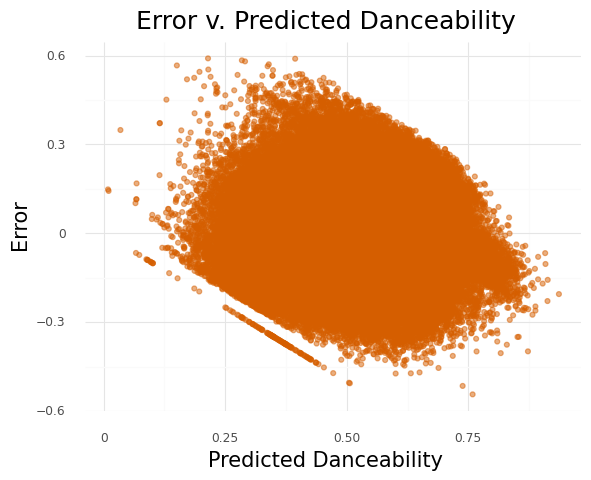

<ggplot: (8772068690961)>

In [13]:
#Error v. Predicted  
assumption = pd.DataFrame({"error": np.subtract(true_values2,predicted_Outcome2) , "predicted":predicted_Outcome2})

(ggplot(assumption , aes(x = "predicted", y = "error")) + geom_point(alpha = 0.5, color = "#d55e00")+
ggtitle("Error v. Predicted Danceability") +
labs(x = "Predicted Danceability", y = "Error")+
theme_minimal()+ 
theme(plot_title = element_text(size =18),
axis_title = element_text(size =15)))

Caption: This is a plot of the model's error (predicted outcome- actual outcome) vs. the danceability the model predicted to visualize the distribution of error and how much it varies. This type of graph also allows us to see if any assumptions of homoscedasticity or normality of errors were violated. The normality of errors were generally not violated because the error appears to decrease as we get further from zero. However,the graph shows that homoskedaticisty is violated because there is a clump of data sets with a downward linear pattern. As the value of predicted danceability increased the error declined. This is concerning because this means that the model is better at predicting higher danceability scores compared to lower danceability scores. This could be very problematic if we are trying to create playlists based on the model's predicted danceability because if we predict it has a lower danceability score then we are more likely to miscatogorize the song. This odd pattern might be an indicator that a linear model is not the best type of model to have used.

#### Data Visualization 2

In [15]:
#Coefficients
coef = pd.DataFrame({"Coefs" : model1.coef_, "Names" : predictors})
coef = coef.append({"Coefs": model1.intercept_, "Names" : "intercept"}, ignore_index = True)
coef

,Coefs,Names
0,-0.022841,energy
1,-0.017170,instrumentalness
2,0.091667,valence
3,-0.019290,tempo
4,0.041739,loudness
5,0.039782,speechiness
6,0.536345,intercept


####  Interpretations of the coefficents for this model: 
* A one standard deviation increase in energy leads to a 0.022841 unit decrease in danceability. 
* A one standard deviation increase in instrumentalness leads to a 0.017170 unit decrease in danceability. 
* A one standard deviation increase in valence leads to a 0.091667 unit increase in danceability. 
* A one standard deviation increase in tempo leads to a 0.019290 unit decrease in danceability. 
* A one standard deviation increase in loudness leads to a 0.041739 unit increase in danceability. 
* A one standard deviation increase in speechiness leads to a 0.039782 unit increase in danceability.
* When all the predictors are 0 (energy, instrumentalness, valence, tempo, loudness, speechiness), we expect a song's danceability to be 0.536345. 

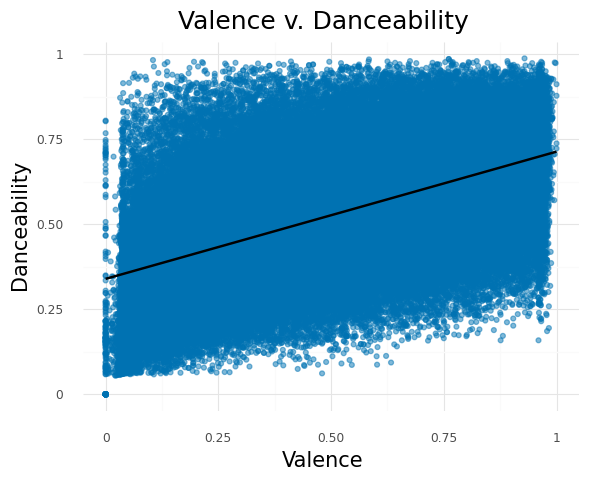

<ggplot: (8777033766641)>

In [30]:
# Variable with the strongest relationship
(ggplot(spotify, aes(x= "valence", y = "danceability")) + 
 geom_point(alpha = 0.5, color = "#0072b2")+
theme_minimal()+
ggtitle("Valence v. Danceability")+
 theme(plot_title = element_text(size =18),
axis_title = element_text(size =15))+
labs(x =  "Valence", y = "Danceability") + geom_smooth())
                                       

Caption: This scatterplot demonstrates the relationship between danceability and valence which is the variable that has the largest affect on danceability. This graph shows a positive linear relationship between valence and danceability (the higher the valence is in a song the higher the song danceability tends to be). 

### Question 2: Can we group songs by valence and danceability to create possible playlists?
#### Changes to Analysis Plan: None.
#### a) The analysis code

In [16]:
np.random.seed(100)
#EM Model
features2 = ["valence", "danceability"]
X2 = spotify[features2]
z= StandardScaler()
X2 = z.fit_transform(X2)
EM = GaussianMixture(n_components = 4)
EM.fit(X2)
cluster = EM.predict(X2)
print(silhouette_score(X2, cluster))

0.37886239803506583


#### b) Answer to Question 2

To measure if we are able to group songes by valence and danceability to create possible playlists we analyzed the model's silhouette score. Since silhouette scores are measured on a scale of -1 to 1 where the closer the score is to 1 means the clusters created have high cohesion within each cluster and high separation between the clusters meaning that we were able to create distinct playlists. If the score is close to 0 or -1 then that means there is no cohesion and separation in the clusters created by the model and we weren't able to successfully create distinct playlists. After testing various number of clusters, four clusters resulted in the highest silhouette score of 0.37884. We concluded that we were able to create extremely large possible playlists based on danceability and valence that may have some similarities since the silhouette score wasn't extremely close to one. 

#### Data Visualization 1

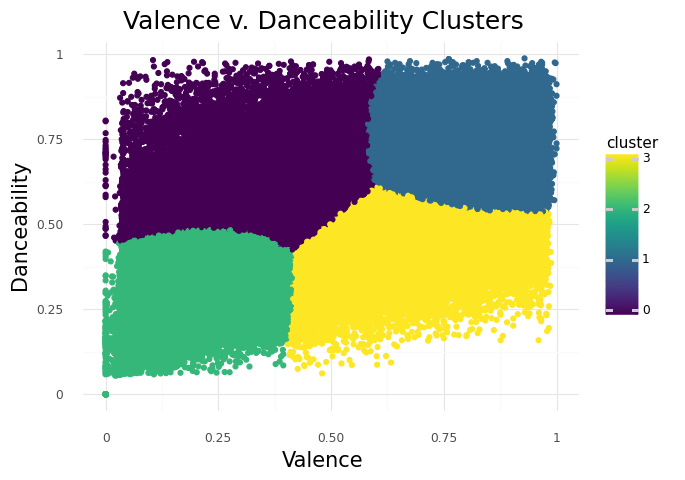

<ggplot: (8777047556018)>

In [39]:
(ggplot(spotify,aes(x= "valence", y="danceability", color = "cluster")) + geom_point()+
theme_minimal()+
ggtitle("Valence v. Danceability Clusters")+
theme(plot_title = element_text(size= 18),
axis_title = element_text(size =15))+
labs(x =  "Valence", y = "Danceability"))

Caption: This graph displays the datapoints clustered together based on  danceability and valence. Each color represents one cluster and a potential playlist that could be created. The blue cluster/playlist seems to contain songs that have a below average danceability and valence which might include slower songs, instrumental, heavy metal, or lowfi music. The yellow cluster/playlist appears to be composed of songs that have an above average danceability and low valence which might include genres like R&B, Alternative Hip Hop, and Electropop. The purple cluster/playlist has songs that have an above average valence and below average danceability which might include Indie, Alternative,and Rap. The green cluster/playlist appears to have songs that have an above average danceability and above average valence which might include genres like Hip Hop, Latin, EDM, and Pop. 

#### Data Visualization 2

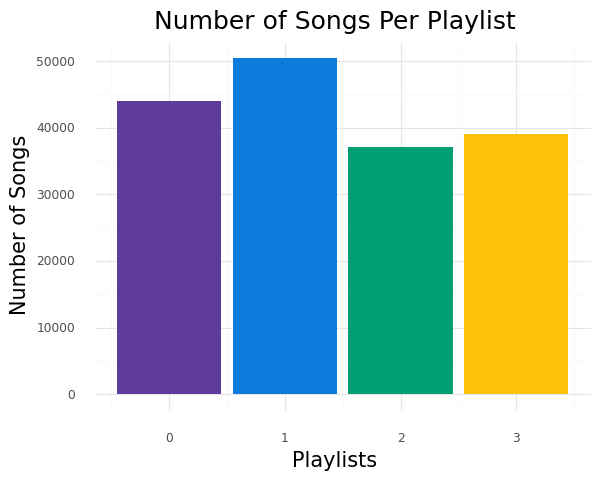

<ggplot: (8777050186189)>

In [40]:
spotify["cluster"]= cluster
(ggplot(spotify,aes(x= "cluster")) + geom_bar(aes(fill = "factor(cluster)"))+
theme_minimal()+
ggtitle("Number of Songs Per Playlist")+
 theme(plot_title = element_text(size =18),
axis_title = element_text(size =15), legend_position = "none")+
labs(x =  "Playlists", y = "Number of Songs")
+scale_fill_manual(values = ["#5D3A9B", "#0C7BDC","#009e73","#FFC20A", ]))

Caption: This bar graph shows the number of songs that could go into each playlist. The playlist with the most songs has a below average valence and high danceability while the playlist with the least amount of songs has low valence and low danceability. All four playlists contains tens of thousands of potential songs that possibly could be further broken down into smaller playlists with further analysis. 

#### Changes to Analysis Plan:

### Question 3: Which variable(s) have the largest impact on if a song is popular or not?
#### Changes to Analysis Plan:
We weren't able to use all of the coefficients in the dataset to determine which variables were most important. We removed "artists", "id", "name", "release_date" because with 170,653 data points almost each of these variables were unique to the song. Since it was both computationally expensive and appeared to be generally unique to each song we decided to not include these variables in the lasso model. 

For our first visualization, we chose to use a bar chart instead of using a boxplot to graph the the different coefficient values relative to a song's popularity because we were only showing one value and a bar chart clearly shows which coefficient has a larger impact on a song's popularity because of its bar size. Box plot is more useful when trying to show the average of a group of datapoints. 

We also decided to add another component to our second visualization to show the relationship between a song's popularity, the song's release year (the variable that has the highest impact on a song's popularity), and the song's acousticness (the variable that has the second highest impact on a song's popularity) because we noticed that we had nearly identical graphs between this question and the other question that explores if we can predict the year a song was released based on the variables danceability, energy, popularity, speechiness, and valence. When we developed our plan we said that we would graph the relationship between the outcome variable and the variable with the highest impact on that outcome. We didn't know that a song's popularity would have the highest impact on predicting a song's release date and vice versa. To make the graph slightly different and depict more information that is specific to predicting a song's popularity, we chose to color coordinate the datapoints by the acousticness of the song to see if we can observe any patterns. 
#### a) The analysis code

In [20]:
new_spot = spotify.drop(columns = ["artists", "id", "name", "release_date"])
feat = ["valence", "year", "acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness", "key", "liveness","loudness", "mode", "speechiness", "tempo"]
X3 = new_spot[feat]
y3 = new_spot["popularity"]

In [21]:
np.random.seed(100)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size = 0.2)

z = StandardScaler()

X3_train[feat] = z.fit_transform(X3_train[feat])
X3_test[feat] = z.transform(X3_test[feat])

X_train.head()

lsr_tune = LassoCV(cv = 5).fit(X3_train,y3_train)

In [22]:
coef_lasso = pd.DataFrame({"Coefs" : lsr_tune.coef_, "Names" : feat})
coef_lasso

,Coefs,Names
0,0.114431,valence
1,17.308212,year
2,-1.477768,acousticness
3,0.494446,danceability
4,-0.027311,duration_ms
5,-0.286215,energy
6,0.233321,explicit
7,-1.292555,instrumentalness
8,-0.000000,key
9,-0.521948,liveness


#### b) Answer to Question 3

The variables that have the largest impact on a song's popularity is year, acousticness, instrumentalness, speechiness, liveliness, and danceability. According to the lasso model we created, the key that the song is played in and the loudness of the song are the only variables that does not have an impact on a song's popularity. We came to this conclusion based on the coefficients of all the variables. If the coefficient value was zero then the variable had no impact on a song's popularity. The higher the coefficient value was the more impact the variable had on a song's popularity. 

###### Top 5 Variables with the Largest Impact on Song Popularity
1. A one standard deviation increase in year leads to a 17.308212 unit increase in a song's popularity. 

2. A one standard deviation increase in acousticness leads to a 1.477768 unit decrease in a song's popularity.

3. A one standard deviation increase in instrumentalness leads to a 1.292555 unit decrease in a song's popularity. 

4. A one standard deviation increase in speechiness leads to a 1.229689 unit decrease in a song's popularity.

5. A one standard deviation increase in liveness leads to a 0.521948 unit decrease in a song's popularity. 

##### Other Variables (in order of importance)
6. A one standard deviation increase in danceability leads to a 0.494446 unit increase in a song's popularity. 

7. A one standard deviation increase in energy leads to a 0.286215 unit decrease in a song's popularity. 

8. If a song is explicit we excpect a song's popularity to be 0.233321 units more than a song that is not explicit. 

9. A one standard deviation increase in duration_ms leads to a 0.027311 unit decrease in a song's popularity.

10. A one standard deviation increase in mode leads to a 0.050843 unit decrease in a song's popularity. 
 
11. A one standard deviation increase in tempo leads to a 0.054878 unit increase in a song's popularity.

#### c) Two data visualizations + captions.

#### Data Visualization 1

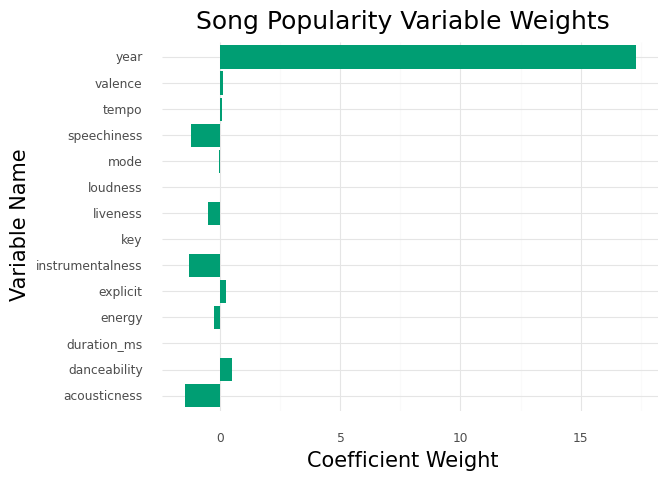

<ggplot: (8772081549325)>

In [23]:
(ggplot(coef_lasso, aes(x = "Names", y = "Coefs"))+  
 geom_bar(stat = "identity", fill = "#009e73")+
 scale_fill_manual(values = ["#d55e00", "#009e73","#cc79a7", "#0072b2", "#f0e442"])+
coord_flip()+
 theme_minimal()+
ggtitle("Song Popularity Variable Weights")+
 theme(plot_title = element_text(size =18),
axis_title = element_text(size =15))+
labs(x =  "Variable Name", y = "Coefficient Weight"))

Caption: This bar graph shows the variables that have the highest impact on a song's popularity. The year the song was released has the highest positive impact on a song's popularity while the song's key, loudness, and duration_ms appears to have little to no impact on a song's popularity.  

#### Data Visualization 2

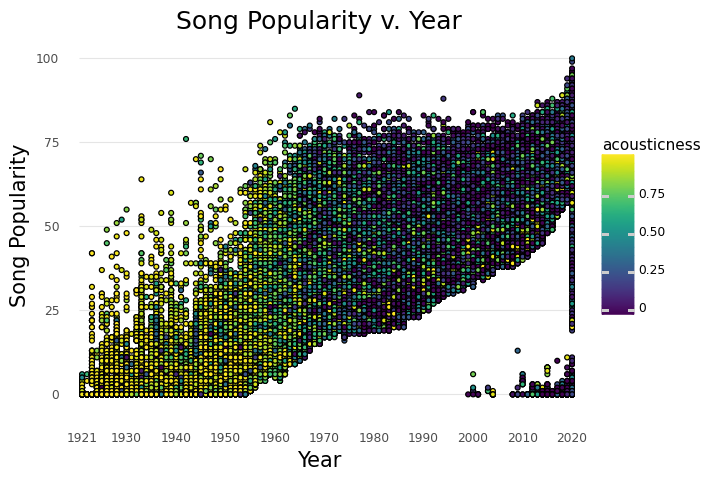

<ggplot: (8772019104461)>

In [125]:
(ggplot(spotify, aes(x = "year", y = "popularity", fill = "acousticness"))+ geom_point()+
 theme_minimal()+
scale_x_discrete(breaks= [1921, 1930,1940, 1950, 1960, 1970,1980,1990,2000,2010,2020])+
ggtitle("Song Popularity v. Year")+
 theme(plot_title = element_text(size =18),
axis_title = element_text(size =15),
panel_grid_minor_y =element_blank(),
panel_grid_minor_x =element_blank(),
panel_grid_major_x =element_blank())+
labs(x =  "Year", y = "Song Popularity"))

Caption: This scatter plot shows the relationship between a song's popularity, the year the song was released (the variable with the highest impact on a song's popularity), and the acousticness of the song (the variable with the second highest impact on a song's popularity). This graph shows a positive linear pattern between the song's release year and the song's popularity where as the year's progressed songs grew to become increasingly more popular. However, as song popularity was growing the acousticness of the songs were decreasing over the years. This observation connects back to the negative relationship we found betweeen acousticness and song popularity when we analyzed the variable coefficients. Over time, as the acousticness decreases in songs the songs' popularity increases. 

### Question 4: Can we predict the popularity of a song based on all other variables?

#### a) The analysis code

In [28]:
#data

df = pd.DataFrame(data = spotify)
df.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [29]:
#clean data
#removing columns & checking for NA values

df.isnull().sum()
df = df.drop(columns = ["artists", "id", "name", "release_date"])
df.columns


Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

In [30]:
#split

predictors_4 = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo']

x4_train, x4_test, y4_train, y4_test = train_test_split(df[predictors_4], df["popularity"], test_size=0.2)

#z score

zscore = StandardScaler()
zscore.fit(x4_train)
xz4_train = zscore.transform(x4_train)
xz4_test = zscore.transform(x4_test)


In [31]:
#ridge

rr_tune = RidgeCV(cv = 10).fit(xz4_train,y4_train)

print("TRAIN: MSE", mean_absolute_error(y4_train, rr_tune.predict(xz4_train)),"R2", r2_score(y4_train, rr_tune.predict(xz4_train)))
print("TEST : MSE", mean_absolute_error(y4_test, rr_tune.predict(xz4_test)),"R2", r2_score(y4_test, rr_tune.predict(xz4_test)))
print("Chose alpha as value " + str(rr_tune.alpha_))


TRAIN: MSE 2.382742221268023e-05 R2 0.9999999999978223
TEST : MSE 2.39104633758935e-05 R2 0.9999999999978191
Chose alpha as value 0.1


In [32]:
MSE_4 = [mean_absolute_error(y4_train, rr_tune.predict(xz4_train)),
        mean_absolute_error(y4_test, rr_tune.predict(xz4_test)) ]

R2_4 = [r2_score(y4_train, rr_tune.predict(xz4_train)), r2_score(y4_test, rr_tune.predict(xz4_test))]

labels_4 = ["Train", "Test"]

scores4 = pd.DataFrame(data = MSE_4)
scores4["MSE"] = scores4[0]
scores4["R2"] = R2_4
scores4["label"] = labels_4


scores4

,0,MSE,R2,label
0,0.000024,0.000024,1.0,Train
1,0.000024,0.000024,1.0,Test


#### Data Visualization 1

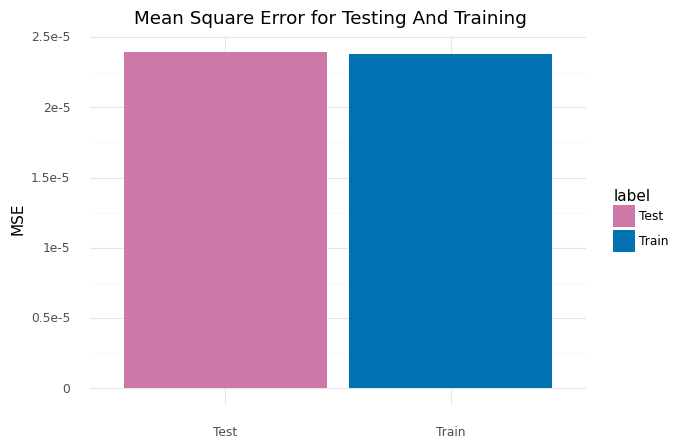

<ggplot: (8772001618849)>

In [41]:
#ggplot MSE

(ggplot(data = scores4) + aes(x = "label", y = "MSE", fill = "label") + geom_bar(stat = "identity") + theme_minimal() + ggtitle("Mean Square Error for Testing And Training") + xlab("") 
+ scale_fill_manual(values = ["#cc79a7", "#0072b2"] ) )


Caption: This bar graph here is used to show the Mean sqaure error between our testing and training set. By showing that these are similar we are confirming that our data is not too overfit to the training data. This our shows our low MSE of only .000024, telling us that data is very close to the regression line.

#### Data Visualization 2

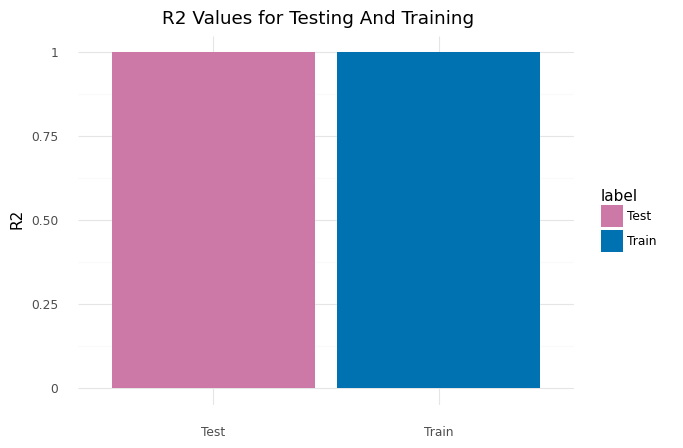

<ggplot: (8772000264725)>

In [42]:
#ggplot R2

(ggplot(data = scores4) + aes(x = "label", y = "R2", fill = "label") + geom_bar(stat = "identity") + theme_minimal() + ggtitle("R2 Values for Testing And Training") + xlab("")
 + scale_fill_manual(values = ["#cc79a7", "#0072b2"]))


Caption: This graph here shows us the R2 values between the testing and training data. The R2 values were rounded to one and show us that our model explains over 99% of the varibility of the response data for the testing and training, showing again, that our model is not overfit to the training data.  

#### b) Answer to Question 4

For this question, I decided to remove the k fold cross validation based on feedback from peers that it is redunant to
use to combat overfitting since we were already using ridge regression, and this saves us computational power. I decdided to use to ridge here instead of lasso because I did not want to shrink any of our variables with small coefficients to use since they might still have a small impact and we do have multiple variables, and I also found that ridge gave us a higher R2 value and a lower MSE value. I also changed the data visualizations here to be more easily understood based off of the informatio we got which is our MSE and R2 values. Overall, from the the analysis on this question, we can see that based on our results, we can accuratley predict the popularity of a song.  



### Question 5: How many principal components are needed to explain the varience of at least 95% of liveness of a song?
#### a) The analysis code

In [45]:

#z score

features_5 = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'liveness', 'instrumentalness', 'key', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo', 'popularity']

df[features_5] = zscore.fit_transform(df[features_5])


In [46]:
#PCA

pca = PCA()
pca.fit(df[features_5])

PCA()

In [47]:
pcaDF_5 = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_,
                        "pc": range(1,16),
                        "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF_5.head(10)

,expl_var,pc,cum_var
0,0.305783,1,0.305783
1,0.126184,2,0.431967
2,0.082028,3,0.513995
3,0.077876,4,0.591872
4,0.071761,5,0.663632
5,0.062226,6,0.725858
6,0.060051,7,0.785909
7,0.056165,8,0.842074
8,0.048952,9,0.891026
9,0.044226,10,0.935252


#### Data Visualization 1

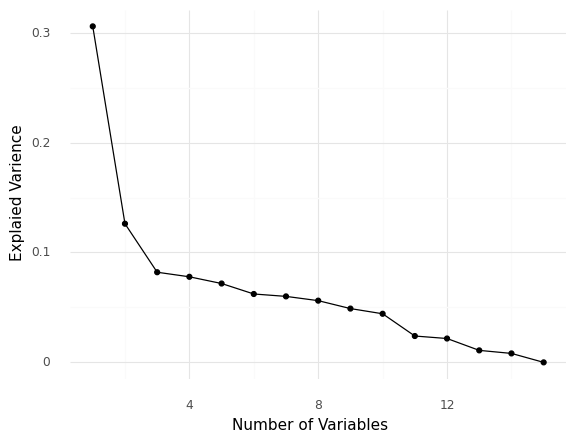

<ggplot: (8772006036885)>

In [48]:
#Scree plot

(ggplot(pcaDF_5, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() + theme_minimal()
  + xlab("Number of Variables") + ylab("Explaied Varience"))

#### Data Visualization 2

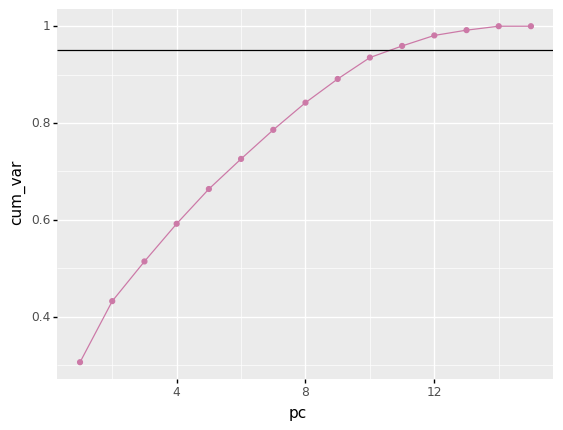

<ggplot: (8772014523869)>

In [49]:
#Cumulative graph

(ggplot(pcaDF_5, aes(x = "pc", y = "cum_var")) + geom_line(color = "#cc79a7") +
 geom_point(color = "#cc79a7") + geom_hline(yintercept = 0.95))

In [50]:
#Logisitic Regression
pcomps5 = pca.transform(df[features_5]) #chose 5 based on screen plot
pcomps5 = pd.DataFrame(pcomps5[:,1:5])

pcomps11 = pca.transform(df[features_5])
pcomps11 = pd.DataFrame(pcomps11[:, 1:11]) # chose 11 based on the cumulative graph

#model all
lr1_5 = LogisticRegression()
lr1_5.fit(df[features_5], df["explicit"])

#model 11
lr2_5 = LogisticRegression()
lr2_5.fit(pcomps11, df["explicit"])


#model 5
lr3_5 = LogisticRegression()
lr3_5.fit(pcomps5, df["explicit"])



print("All Data: ", lr1_5.score(df[features_5], df["explicit"]))
print("9 PCs:   ", lr2_5.score(pcomps11, df["explicit"]))
print("5 PCs:    ", lr3_5.score(pcomps5, df["explicit"]))


All Data:  0.940411243869138
9 PCs:    0.9183079113757157
5 PCs:     0.9163741627747535


In [51]:
loadings_5 = pd.DataFrame({"loading": pca.components_.flatten(),
            "comp": np.repeat(range(1,16), 15 ,
        axis=0), "variable":np.tile(features_5,15) })

loadings_5.head(15)

,loading,comp,variable
0,-0.132245,1,valence
1,-0.393300,1,year
2,0.376590,1,acousticness
3,-0.178896,1,danceability
4,-0.015277,1,duration_ms
5,-0.374133,1,energy
6,0.005385,1,liveness
7,0.222912,1,instrumentalness
8,-0.012853,1,key
9,-0.356301,1,loudness


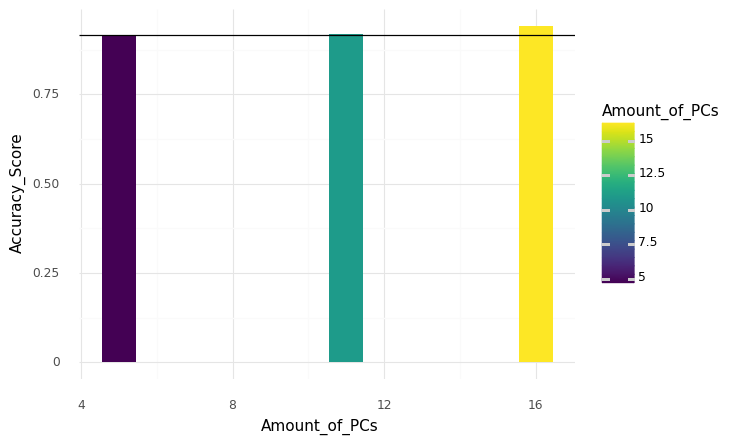

<ggplot: (8772014541237)>

In [52]:
#ggplot
data = [[lr3_5.score(pcomps5, df["explicit"]), 5],
        [lr2_5.score(pcomps11, df["explicit"]), 11],
        [lr1_5.score(df[features_5], df["explicit"]), 16]]  

df5 = pd.DataFrame(data, columns = ["Accuracy_Score", "Amount_of_PCs"])
df5

ggplot(data = df5) + aes(x = 'Amount_of_PCs', y = 'Accuracy_Score', fill = "Amount_of_PCs") + geom_bar(stat = "identity") + theme_minimal() + geom_hline(yintercept = .9163741627747535, color = "black") 



Caption: The bar graph here shows that between using 5 principal componenets, 11 principal components, or all 16 prinicipal components, we get about the same accuracy score. Meaning that we can drop many of our principal compments and still maintain high acccuracy of over 90%, while saving computional power, since using only 5 prinicpal comonents gives us higher than 90% accuracy.  

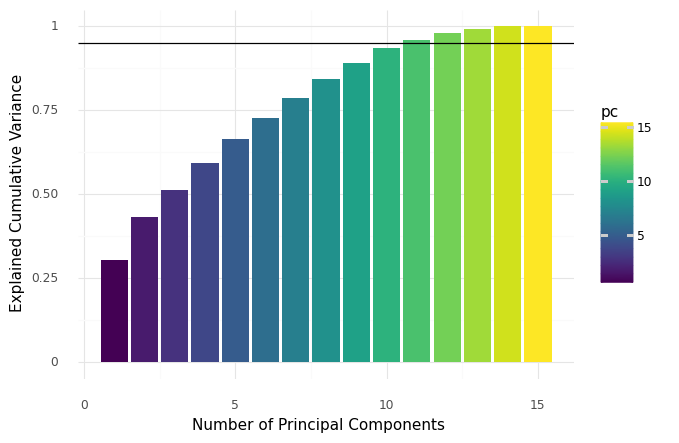

<ggplot: (8772014522997)>

In [53]:
#gglplot

pcaDF_5

ggplot(data = pcaDF_5) + aes(x = "pc", y = "cum_var", fill = "pc") + geom_bar(stat = "identity") + theme_minimal() + xlab("Number of Principal Components") + ylab("Explained Cumulative Variance") + geom_hline(yintercept = 0.95) 



Caption: This graph here shows us how much the cumulative explained variance changes with each additional principal component. We can see that by having 11 principal components we reach having 95% explained variance.

#### b) Answer to Question 5
I decided to change to prediciting if a song is explicit or not in order to precit a binary variable and use logisitic regression instead of trying to use linear regression to predict the continous variable liveness. I also decided to change my data visualizations in order to use a  bar plot of the accuracy score as my second data vizulization since I was not sure if the scree plot would count, and I thought it was important to make sure our model was still accurate. Using a second bar plot to help us answer our question and see our cumulative vairence of our principal components. Overall, from the analysis done, we can see that by keeping 11 principal components, we are able to maining a high accuracy while explaining over 95% of the variance. Having only 11 PCs only brings down our model score from 94% with all of our data to 91% with the 11.


### Question 6: Over time, have songs become longer in duration or have they gotten shorter?

#### a) The analysis code

In [54]:
#creating decade column

df6 = pd.DataFrame(data = spotify)

conditions = [(df6['year'] >= 1920) & (df6['year'] < 1930), 
              (df6['year'] >= 1930) & (df6['year'] < 1940),
              (df6['year'] >= 1940) & (df6['year'] < 1950),
              (df6['year'] >= 1950) & (df6['year'] < 1960),
              (df6['year'] >= 1960) & (df6['year'] < 1970),
              (df6['year'] >= 1970) & (df6['year'] < 1980),
              (df6['year'] >= 1980) & (df6['year'] < 1990),
              (df6['year'] >= 1990) & (df6['year'] < 2000),
              (df6['year'] >= 2000) & (df6['year'] < 2010),
              (df6['year'] >= 2010) & (df6['year'] < 2020),
              (df6['year'] >= 2020) & (df6['year'] < 2030)]

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

decades = np.select(conditions, values)

df_decades = pd.DataFrame(data = decades)
df_decades

df_decades["year"] = df6["year"]

#changing duration colum unit from miliseconds to minutes
df_decades["duration_min"] = df6["duration_ms"]/60000


df_decades["Decade"] = df_decades[0]

df_decades

,0,year,duration_min,Decade
0,1,1921,13.861117,1
1,1,1921,3.008883,1
2,1,1921,8.334367,1
3,1,1921,3.500000,1
4,1,1921,2.778217,1
...,...,...,...,...
170648,11,2020,5.028567,11
170649,11,2020,2.510900,11
170650,11,2020,3.521333,11
170651,11,2020,5.619117,11


In [55]:
#finding average length of songs in each decade

df_decades.groupby("Decade")["duration_min"].apply(list)

df_grouped = df_decades.groupby("Decade")["duration_min"].apply(list).reset_index(name = "list")
df_grouped

avg_decade1 = sum(df_grouped.iloc[0,1])/len(df_grouped.iloc[0,1])
avg_decade2 = sum(df_grouped.iloc[1,1])/len(df_grouped.iloc[1,1])
avg_decade3 = sum(df_grouped.iloc[2,1])/len(df_grouped.iloc[2,1])
avg_decade4 = sum(df_grouped.iloc[3,1])/len(df_grouped.iloc[3,1])
avg_decade5 = sum(df_grouped.iloc[4,1])/len(df_grouped.iloc[4,1])
avg_decade6 = sum(df_grouped.iloc[5,1])/len(df_grouped.iloc[5,1])
avg_decade7 = sum(df_grouped.iloc[6,1])/len(df_grouped.iloc[6,1])
avg_decade8 = sum(df_grouped.iloc[7,1])/len(df_grouped.iloc[7,1])
avg_decade9 = sum(df_grouped.iloc[8,1])/len(df_grouped.iloc[8,1])
avg_decade10 = sum(df_grouped.iloc[9,1])/len(df_grouped.iloc[9,1])
avg_decade11 = sum(df_grouped.iloc[10,1])/len(df_grouped.iloc[10,1])

averages = [avg_decade1, avg_decade2, avg_decade3, avg_decade4, avg_decade5, avg_decade6, avg_decade7, avg_decade8, 
           avg_decade9, avg_decade10, avg_decade11]
decades_list = [1,2,3,4,5,6,7,8,9,10,11]

averages = pd.DataFrame(data = averages)
averages["decade"] = decades_list
averages["avg_song_length"] = averages[0]
averages

,0,decade,avg_song_length
0,3.062820,1,3.062820
1,3.460277,2,3.460277
2,3.631578,3,3.631578
3,3.674715,4,3.674715
4,3.527807,5,3.527807
5,4.234195,6,4.234195
6,4.202006,7,4.202006
7,4.143259,8,4.143259
8,3.991957,9,3.991957
9,3.784821,10,3.784821


#### Data Visualization 1

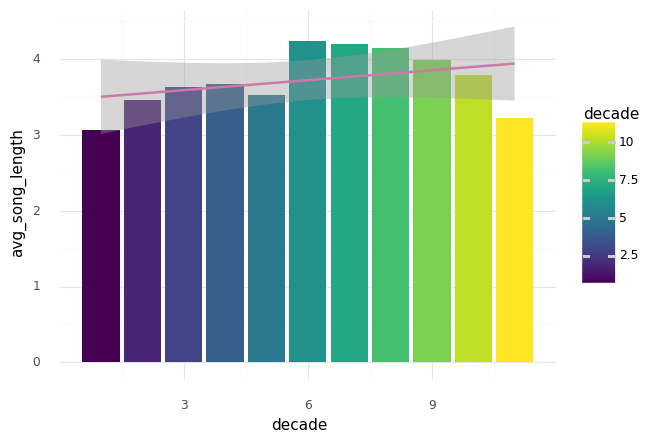

<ggplot: (8772014561589)>

In [56]:
#bar plot

ggplot(data = averages) + aes(x = "decade", y = "avg_song_length", fill = "decade") + geom_bar(stat = "identity") + theme_minimal() + geom_smooth(method = "lm", color = "#cc79a7") 


Caption: The bar graph here is being used to show average length of songs during the decade they were released in. While we do not see a strong relationship here of the average song length versus time, we can see by the slope of the regression line that over time there has been, on average, a slight increase in the length of songs. 

#### Data Visualization 2

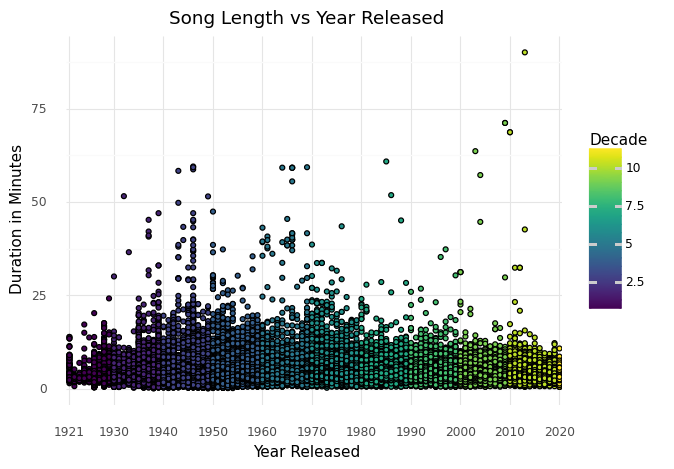

<ggplot: (8772001666601)>

In [59]:
#scatterplot 

(ggplot(df_decades, aes(x = "year", y = "duration_min", fill = "Decade")) + geom_point() + theme_minimal() + xlab("Year Released")
 + ylab("Duration in Minutes") + ggtitle("Song Length vs Year Released") + geom_smooth(method = "lm", color = "#cc79a7")
+ scale_x_discrete(breaks= [1921, 1930,1940, 1950, 1960, 1970,1980,1990,2000,2010,2020]))


Caption: This scatter plot is used to show the duration of each song based on when each song was released. Because of the amount of data points, I found this graph to be slightly harder to read, but it does show us all of the outliers that have an impact on our overall trend. From this scatter plot, we can see that most songs have stayed around about that same length over time, but there have been many outliers over years, and from the trend line, we see that song duration has stayed relativley the same.  

#### b) Answer to Question 6
Overall from the analysis done, we can see that the duration of songs has not changed very much over time. While the average may vary based on the decade, we have generally stayed around the same duration for most songs.

### Question 7: Can the variables danceability, energy, popularity, speechiness, and valence predict the year a song was released? 

#### Changes to the Analysis Plan:

Originally, I was going to answer the question 'Can the variables danceability, energy, popularity, speechiness, and valence predict the release date of a song' using a logistic regression model. Based upon the feedback I received, I realized that a logistic regression model would not be appropriate since the release date of a song is not a binary variable, and even if I were to treat each day as a category, the model would not work very well. Instead, I am going to run a linear regression model which will be more appropriate since this model is used to predict continuous variables. Also, instead of predicting the variable 'release date' I decided to use the model to predict the variable 'year' which tells us the year the song was released. I thought by using this variable instead that it would give me similar results since we are still predicting when the song was released, but because of the simplicity of the 'year' variable I thought this would result in the model having more clear and accurate results.  

As for the data visualizations, since I have changed the model I will be using, I also decided to change the visualizations I will be using. Now, I will be plotting the true values against the predicted values, as well as plotting the variables that have the highest and lowest impacts against the 'year' variable. I will determine which variables have the highest and lowest impacts by using the coefficient values for the variables.

#### a) The analysis code

In [61]:
predictors7 = ["danceability", "energy", "popularity", "speechiness", "valence"]

x7 = spotify[predictors7]
y7 = spotify["year"]

kf7 = KFold(n_splits = 10)

lr7 = LinearRegression()
mse7 = []
r27 = []

Below is the process of splitting the data into 10 different folds, z-scoring all of the variables, and fitting the newly z-scored variables to the model. 

In [62]:
for train,test in kf7.split(x7):
    x7_train = x7.iloc[train]
    x7_test  = x7.iloc[test]
    y7_train = y7[train]
    y7_test  = y7[test]

In [63]:
zscore7 = StandardScaler()

zscore7.fit(x7_train)

StandardScaler()

In [64]:
x7z_train = zscore7.transform(x7_train)

In [65]:
x7z_test = zscore7.transform(x7_test)

In [66]:
model7 = lr7.fit(x7z_train, y7_train)

Below is the process of finding the Mean Squared Error and R Squared values for each fold and averaging them together.

In [67]:
mse7.append(mean_squared_error(y7_test, model7.predict(x7z_test)))
r27.append(r2_score(y7_test, model7.predict(x7z_test)))

In [68]:
print("Mean Squared Error: ", np.mean(mse7))

Mean Squared Error:  240.98222203601685


In [69]:
print("R Squared: ", np.mean(r27))

R Squared:  0.5710573221224788


In [70]:
y7_pred = model7.predict(x7z_test)

In [71]:
true_vs_pred7 = pd.DataFrame({"predict": y7_pred, "trueV": y7_test})

#### Data Visualization 1

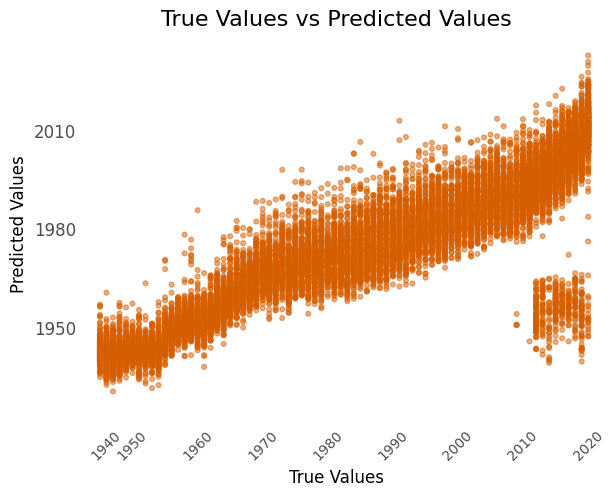

<ggplot: (8772028242949)>

In [119]:
(ggplot(true_vs_pred7, aes(x = "trueV", y = "predict")) + geom_point(alpha = 0.5, color = "#d55e00") + theme_minimal() +
 ggtitle("True Values vs Predicted Values") +
    labs(x = "True Values", y = "Predicted Values ") +
    stat_smooth(method = "lm") + 
    theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(),
    panel_grid_major_y = element_blank(), panel_grid_minor_y =
    element_blank(),
    axis_text_x = element_text (size = 12), axis_title_x = element_text(size = 12),
    axis_text_y = element_text (size = 12), axis_title_y = element_text(size = 12),
    plot_title = element_text(size = 16), legend_title = element_text(size = 12))
+ scale_x_discrete(angle = 90, breaks= [1940, 1950, 1960, 1970,1980,1990,2000,2010,2020])+
theme(axis_text_x = element_text(angle = 45, size = 10)))

Caption: Shown above is a graph depicting the relationship between the values the model predicted versus the true values, which is essentially showing how the model is performing. The model would be performing extremely well if all of the data points fell on the diagonal line, showing that the predicted and true values are exactly the same. In the graph, a majority of the data points appear to fall on the diagonal line, but there are a few specific areas on the graph that have outliers, showing the model was not able to predict the year certain songs were released. Overall, the model seems to be performing well, but there is definite room for improvement in the accuracy of the model. 

In [89]:
coef7 = pd.DataFrame({"Coef": model7.coef_, "Name": predictors7})
coef7 = coef7.append({"Coef": model7.intercept_, "Name":"intercept"}, ignore_index = True)
coef7

,Coef,Name
0,2.198754,danceability
1,4.974860,energy
2,19.627191,popularity
3,-0.991143,speechiness
4,-3.867710,valence
5,1975.759005,intercept


In order to determine which variables had the the largest and smallest overall impact in predicting the year a song was released, I decided to print out the coefficient values. The variable 'Popularity' had an overwhelmingly large impact on the release date of the song. As the popularity increases by 1 standard deviation there will be a 19.627191 increase in the predicted year that a song was released. The variable 'Speechiness' seemed to have a very small impact on the release date of the song. As the speechiness increases by 1 standard deviation there will be a 0.991143 decrease in the predicted year that a song was released.

#### Data Visualization 2

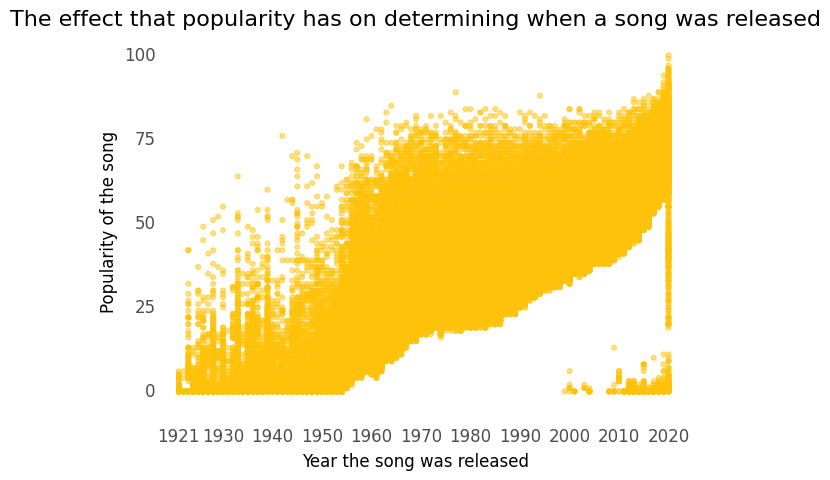

<ggplot: (8772028522473)>

In [122]:
(ggplot(spotify, aes(x = "year", y = "popularity")) + geom_point(alpha = 0.5, color = "#FFC20A") +
    ggtitle("The effect that popularity has on determining when a song was released") +
    labs(x = "Year the song was released", y = "Popularity of the song") +
    theme_minimal() +
    theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(),
    panel_grid_major_y = element_blank(), panel_grid_minor_y =
    element_blank(),
    axis_text_x = element_text (size = 12), axis_title_x = element_text(size = 12),
    axis_text_y = element_text (size = 12), axis_title_y = element_text(size = 12),
    plot_title = element_text(size = 16), legend_title = element_text(size = 12),
    legend_text = element_text(size = 12))+
scale_x_discrete(breaks= [1921, 1930,1940, 1950, 1960, 1970,1980,1990,2000,2010,2020]))

Caption: In the graph above, I plotted the years that songs were released against the popularity of the song. The variable 'Popularity' had the biggest overall impact on predicting the year a song was released, and in the graph there is a pretty distinct correlation between the two. Although there are some outliers in the graph, it appears that the more recent the release date of the song, the more popular it is, which makes sense from a day to day standpoint. Songs from the 1970s and on are likely to be listened to more frequently than songs that were made back in the 1920s, since people can relate to the newer music. All in all, this makes sense as to why this variable has the largest overall impact on predicting the year a song was released. 

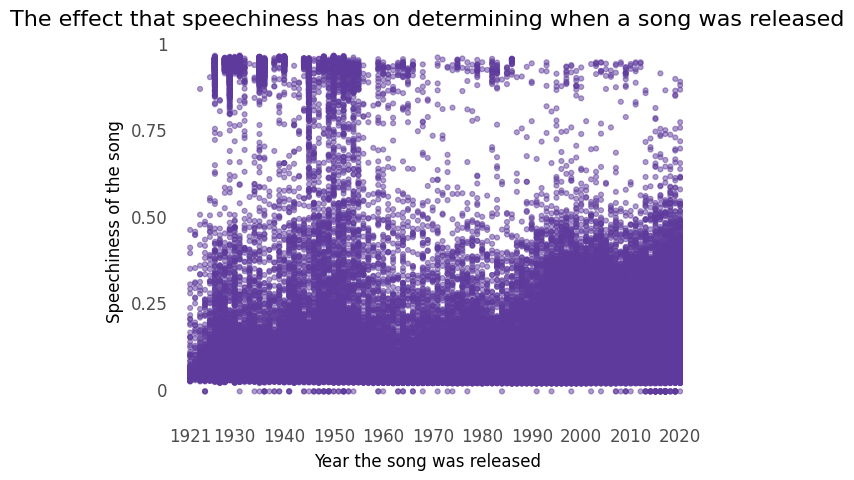

<ggplot: (8772002715201)>

In [123]:
(ggplot(spotify, aes(x = "year", y = "speechiness")) + geom_point(alpha = 0.5, color = "#5D3A9B") +
    ggtitle("The effect that speechiness has on determining when a song was released") +
    labs(x = "Year the song was released", y = "Speechiness of the song") +
    theme_minimal() +
    theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(),
    panel_grid_major_y = element_blank(), panel_grid_minor_y =
    element_blank(),
    axis_text_x = element_text (size = 12), axis_title_x = element_text(size = 12),
    axis_text_y = element_text (size = 12), axis_title_y = element_text(size = 12),
    plot_title = element_text(size = 16), legend_title = element_text(size = 12),
    legend_text = element_text(size = 12))+
scale_x_discrete(breaks= [1921, 1930,1940, 1950, 1960, 1970,1980,1990,2000,2010,2020]))

Caption: In the graph above, I plotted the years that songs were released against the speechiness of the song. The variable 'Speechiness' had the smallest impact in predicting the year a song was released, and the graph portrays this minimal impact well. There is no correlation whatsoever between the year a song was released versus the speechiness of a song, and the speechiness has varied greatly throughout the past century. Upon viewing this graph, it is clear that the variable 'Speechiness' does not really have a true impact in predicting the year a song was released, so this variable could essentially be taken out of the prediction model.

#### b) Answer to Question 7:

In order to answer this question, I ran a linear regression model where I used K-Fold Cross Validation to split the data, I z-scored all of the variables to ensure they were on the same scale for accurate comparison, and I determined the mean squared error and R squared values. The mean squared error is used to measure how well the model is doing, but there is not one good benchmark to determine what makes a good mean squared error, since it depends on the units of the outcome. Typically, dependent on the outcome, a low mean squared error is better than a high one. The mean squared error is 240.98 years which means that the average squared error between each data point and the predicted value for that data point is 240.98. This value is relatively high for the data set, meaning that the model is not totally accurate. 

The R squared value gives you a standardized score that you can compare across different models. R squared measures the percentage of variation explained by the model, or how different the real data points are from the predicted ones that the model gives us. For R squared, the more variation our model explains, the better it is at performing, so we want the value to be close to one. The value is 0.57, which means that the value is closer to one than it is to zero. The model is doing fairly well, but if could definitely be improved to have an even higher amount of accuracy.

Based upon these findings, the variables danceability, energy, popularity, speechiness, and valence can predict the year a song was released and can be somewhat accurate, but I believe by removing variables that do not have as big of an effect on the outcome such as speechiness (shown above), we may be able to improve the overall accuracy with other variables. Although it is certainly possible to predict the year a song was released based on all of those variables, I believe that the accuracy for the model can be increased even futher by selecting new variables to take the place of the ones that do not have as high of an impact on the model. Overall, the model does still perform relatively well and answers the question, but the main concern relies in the accuracy. 

### Question 8: Can the energy level of songs be predicted using all of the other variables except for name, artist, and release date?

### Changes to the Analysis Plan

Orginally, I was going to test if the energy level of songs could be predicted using all of the other variables in the dataset, but I decided to remove the variables 'name', 'artist', and 'release date' from the model. I chose to remove these variables because I did not think they would provide any more clarity or accuracy in a model trying to predict the energy levels of songs. Also, I already included the variables 'year' in the model, so I did not think it was necessary to also include 'release date' as well since they are very similar variables. 

#### a) The analysis code

In [94]:
predictors8 = ["acousticness", "danceability", "duration_ms", "instrumentalness", "popularity", "tempo", "liveness", 
              "loudness", "speechiness", "key","year", "valence", "mode", "explicit"]

x8 = spotify[predictors8]
y8 = spotify["energy"]

kf8 = KFold(n_splits = 10)

lr8 = LinearRegression()
mse8 = []
r28 = []

Below is the process of splitting the data, z-scoring all of the variables, and fitting the model. 

In [95]:
for train,test in kf8.split(x8):
    x8_train = x8.iloc[train]
    x8_test  = x8.iloc[test]
    y8_train = y8[train]
    y8_test  = y8[test]

In [96]:
zscore8 = StandardScaler()

zscore8.fit(x8_train)

StandardScaler()

In [97]:
x8z_train = zscore8.transform(x8_train)

In [98]:
x8z_test = zscore8.transform(x8_test)

In [99]:
model8 = lr8.fit(x8_train, y8_train)

Below is the process of finding the mean squared error and r squared values for each of the folds, and averaging them all together to make one value for each for the model.

In [100]:
mse8.append(mean_squared_error(y8_test, model8.predict(x8_test)))
r28.append(r2_score(y8_test, model8.predict(x8_test)))

In [101]:
print("Mean Squared Error: ", np.mean(mse8))

Mean Squared Error:  0.015578414950071047


In [102]:
print("R Squared: ", np.mean(r28))

R Squared:  0.7819535705409026


In [103]:
y8_pred = model8.predict(x8_test)

In [115]:
true_vs_pred8 = pd.DataFrame({"predict": y8_pred, "trueV": y8_test})

#### Data Visualization 1

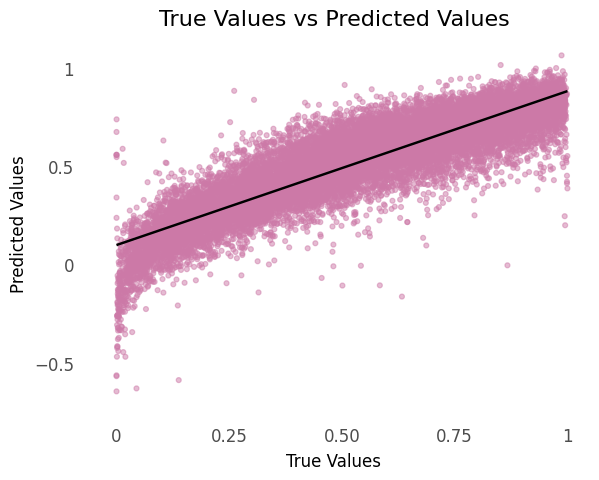

<ggplot: (8772010399065)>

In [117]:
(ggplot(true_vs_pred8, aes(x = "trueV", y = "predict")) + geom_point(alpha = 0.5, color = "#cc79a7") + theme_minimal() +
 ggtitle("True Values vs Predicted Values") +
    labs(x = "True Values", y = "Predicted Values ") +
    stat_smooth(method = "lm") + 
    theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(),
    panel_grid_major_y = element_blank(), panel_grid_minor_y =
    element_blank(),
    axis_text_x = element_text (size = 12), axis_title_x = element_text(size = 12),
    axis_text_y = element_text (size = 12), axis_title_y = element_text(size = 12),
    plot_title = element_text(size = 16), legend_title = element_text(size = 12)))

Caption: Shown above is a graph depicting the relationship between the values the model predicted versus the true values, which is essentially showing how the model is performing. The model would be performing extremely well if all of the data points fell on the diagonal line, showing that the predicted and true values are exactly the same. In the graph, almost all of the data points appear to fall on the diagonal line with very minimal outliers throughout the graph. The model seems to be performing very well when it comes to predicting the energy values.

In [104]:
coef8 = pd.DataFrame({"Coef": model8.coef_, "Name": predictors8})
coef8 = coef8.append({"Coef": model8.intercept_, "Name":"intercept"}, ignore_index = True)
coef8

,Coef,Name
0,-3.160308e-01,acousticness
1,-2.071900e-01,danceability
2,2.724561e-08,duration_ms
3,8.592785e-02,instrumentalness
4,-1.292267e-04,popularity
5,1.412455e-04,tempo
6,1.179087e-01,liveness
7,2.386261e-02,loudness
8,4.892007e-02,speechiness
9,4.258144e-04,key


In order to determine which variables had the the largest and smallest overall impact on predicting the energy level of a song, I decided to print out the coefficient values. The variable 'Year' had the largest impact on the energy levels of a song. As the year increases by 1 standard deviation there will be a 9.478237 increase in the energy level of a song. The variable 'Liveness' seemed to have a small impact on the energy level of a song. As the liveness increases by 1 standard deviation there will be a 1.18 increase in the energy level of a song.

#### Data Visualization 2

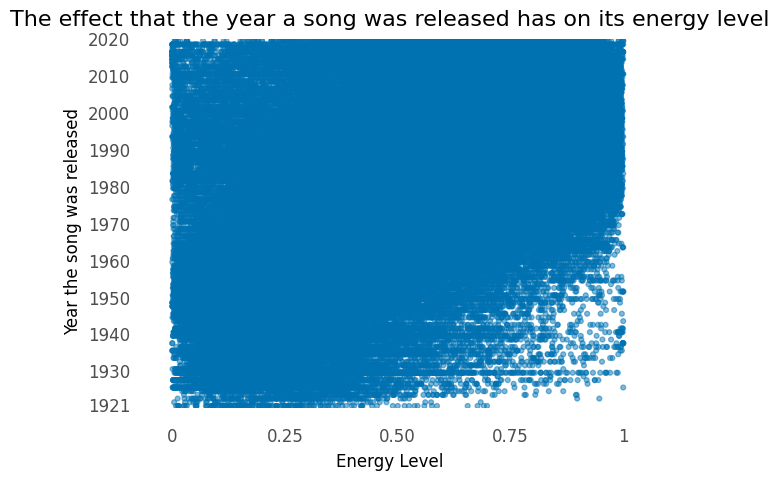

<ggplot: (8772030253993)>

In [116]:
(ggplot(spotify, aes(x = "energy", y = "year")) + geom_point(alpha = 0.5, color = "#0072b2") +
    ggtitle("The effect that the year a song was released has on its energy level") +
    labs(x = "Energy Level", y = "Year the song was released") +
    theme_minimal() +
    theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(),
    panel_grid_major_y = element_blank(), panel_grid_minor_y =
    element_blank(),
    axis_text_x = element_text (size = 12), axis_title_x = element_text(size = 12),
    axis_text_y = element_text (size = 12), axis_title_y = element_text(size = 12),
    plot_title = element_text(size = 16), legend_title = element_text(size = 12),
    legend_text = element_text(size = 12))+
scale_y_discrete(breaks= [1921, 1930,1940, 1950, 1960, 1970,1980,1990,2000,2010,2020]))

Caption: Although most of the graph is covered in data points of varying energy levels of songs throughout the years, there appears to be a pattern where starting a little above the 0.50 energy level, the data points become a little more sparse in the years spanning from 1925 to around 1960. Then, it seems past that point the songs that have more recent release dates tend to have higher energy levels than those that were released in the beginning of the 19th century.

#### b) Answer to Question 8:

In order to answer this question, I ran another linear regression model where I used K-Fold Cross Validation to split the data, I z-scored all of the variables to ensure they were on the same scale for accurate comparison, and I determined the mean squared error and R squared values. The mean squared error is used to measure how well the model is doing, but there is not one good benchmark to determine what makes a good mean squared error, since it depends on the units of the outcome. Typically, dependent on the outcome, a low mean squared error is better than a high one. The mean squared error is 0.0156, which means that the average squared error between each data point and the predicted value for that data point is 0.0156. The values of the mean squared error is relatively low, meaning the model is fairly accurate and performing well. 

The R squared value gives you a standardized score that you can compare across different models. R squared measures the percentage of variation explained by the model, or how different the real data points are from the predicted ones that the model gives us. For R squared, the more variation our model explains, the better it is at performing, so we want the value to be close to one. The value is 0.78, which means that the value is closer to one than it is to zero. The R squared value is extremely high, meaning the model is performing very well and has a good amount of accuracy.

Based upon these findings, the energy level of a song can be predicted using the variables acousticness, danceability, duration_ms, instrumentalness, popularity, tempo, liveness, loudness, speechiness, key, year, valence, mode, and explicit. By using these variables, we are able to achieve a high R squared value and a low mean squared error value, showing that the model is performing well and is extremely accurate. Based on the coefficient values, variables such as 'liveness' could potentially be removed due to the fact that they do not have as big of an effect on the outcome, which could in turn help with the accuracy even more. Overall, this model performs well and using those variables allows us to predict the energy levels of songs in the dataset.

### Question 9: Throughout time, has the danceability rate of songs increased or decreased?¶

#### a) The analysis code

#### Data Visualization 1

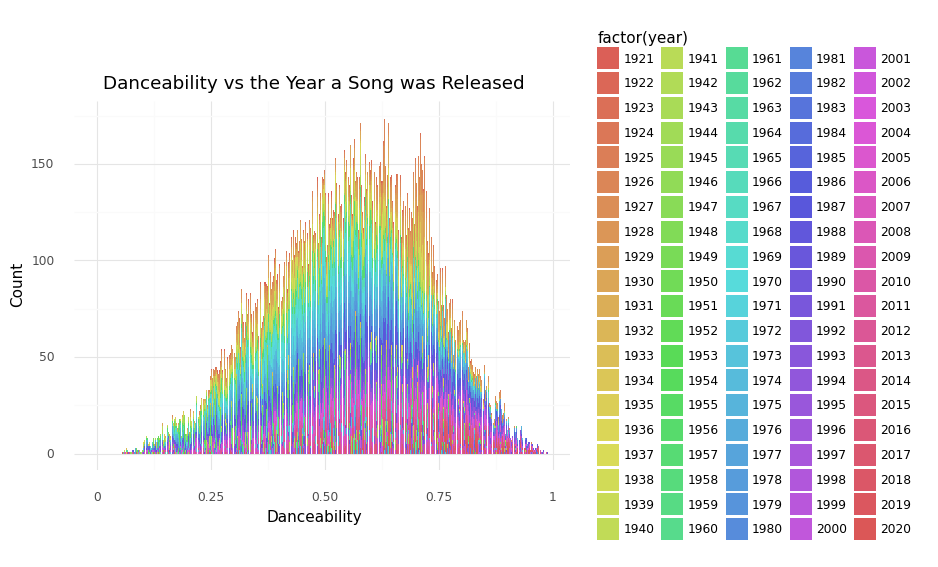

<ggplot: (8772028268549)>

In [112]:
(ggplot(spotify, aes(x = "danceability", fill = "factor(year)")) + geom_bar() + 
ggtitle("Danceability vs the Year a Song was Released") + 
labs(x = "Danceability", y = "Count") + 
theme_minimal())

Caption: The graph above portrays the rate of danceability on the x-axis with the years spanning from 1921 to 2020 filled in to the different bars. The range of colors portrays the different years, and as the years increase and we get closer and closer to modern times, the danceability rate becomes higher. The range of years from 1921 to 1970 when songs were released have lower rates of danceability compared more modern years such as 1980 to 2020.

Below, I am splitting the years from 1920 to 2030 into their different decades and creating a separate dataframe for them in order to visually compare the danceability rate throughout the decades in the data visualization.

In [113]:
df9 = pd.DataFrame(data = spotify)

conditions9= [(df9['year'] >= 1920) & (df9['year'] < 1930),
              (df9['year'] >= 1930) & (df9['year'] < 1940),
              (df9['year'] >= 1940) & (df9['year'] < 1950),
              (df9['year'] >= 1950) & (df9['year'] < 1960),
              (df9['year'] >= 1960) & (df9['year'] < 1970),
              (df9['year'] >= 1970) & (df9['year'] < 1980),
              (df9['year'] >= 1980) & (df9['year'] < 1990),
              (df9['year'] >= 1990) & (df9['year'] < 2000),
              (df9['year'] >= 2000) & (df9['year'] < 2010),
              (df9['year'] >= 2010) & (df9['year'] < 2020),
              (df9['year'] >= 2020) & (df9['year'] < 2030)]

inputs9 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

decade9 = np.select(conditions9, inputs9)

df_decades9 = pd.DataFrame(data = decade9)

df_decades9["year"] = df9["year"]

df_decades9["danceability"] = df9["danceability"]

df_decades9["Decade"] = df_decades9[0]

df_decades9

,0,year,danceability,Decade
0,1,1921,0.279,1
1,1,1921,0.819,1
2,1,1921,0.328,1
3,1,1921,0.275,1
4,1,1921,0.418,1
...,...,...,...,...
170648,11,2020,0.786,11
170649,11,2020,0.717,11
170650,11,2020,0.634,11
170651,11,2020,0.671,11


#### Data Visualization 2

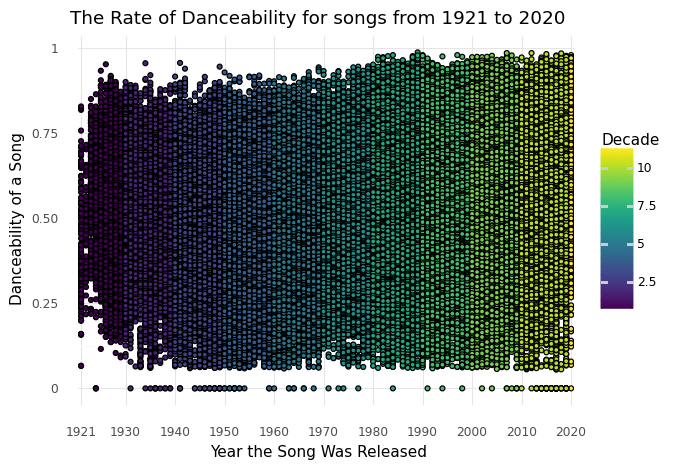

<ggplot: (8772014469005)>

In [114]:
(ggplot(df_decades9, aes(x = "year", y = "danceability", fill = "Decade")) + geom_point() + theme_minimal() +
 ggtitle("The Rate of Danceability for songs from 1921 to 2020") +
    labs(x = "Year the Song Was Released", y = "Danceability of a Song") +
    geom_smooth(method = "lm", color = "blue")+
scale_x_discrete(breaks= [1921, 1930,1940, 1950, 1960, 1970,1980,1990,2000,2010,2020]))

Caption: The graph above shows the year the song was released against the danceability rate of the song throughout 11 decades spanning from 1921 to 2020. It can be noted that although the points are packed very close together, there appears to be a slight increase in the rate of danceability around the years 1975 all the way up until the year 2020.

#### b) Answer to Question 9:

Based on both of the visualizations created, it appears that there has been a slight increase in the rate of danceability throughout the years spanning from 1921 to 2020. In the bar graph visualization, the variable 'danceability' was plotted on the x-axis and the bars were filled in spanning from the year 1921 to the year 2020. Starting from the year 1990 and going to the year 2020, it appears that those colors are the most prevalent in the higher rates of danceability, spanning from 0.75 all the way up to 1. The songs throughout the decade of 1980 tend to span across the graph for levels of danceability, but there are some songs throughout that decade that have high rates of danceability as well. The majority of the songs ranging from 1921 to 1979 are the ones that tend to have lower rates of danceability, more between the ranges of 0.25 to 0.50. This graph cearly portrays that throughout time, spanning from 1921 to 2020, the danceability rate of songs has indeed increased.

In the scatterplot visualization, the year the song was released is on the x-axis while the danceability rate of the song is on the y-axis. The different color coded sections represent the different decades spanning from 1920 to 2030. Although the points are packed very tightly together, it appears that starting at around 1975 there begins to be a steady increase in the danceability rate of the song. Once the year reaches 2020, the danceability rate reaches all the way up to 1, showing that there is in fact an increase in the danceability rate throughout the years.

Overall, throughout time, the danceability rate of songs has actually increased, and this can be proven through the usage of data visualizations comparing the variables 'year' and 'danceability.'